# CPPI 실습 on Python
신한-KAIST 자산관리전문가과정

## 1. Parameter 설정

In [1]:
initial_budget=10000
protection_floor=0.85
m=4 #multiplier
floor=initial_budget*protection_floor
rate=0.02 # yearly

## 2. Stock Price 데이터 불러오기 (S&P500)

In [2]:
import pandas as pd
df=pd.read_excel('CPPI(data).xlsx', index_col=0)
df

,sp500
2000-01-31,1394.46
2000-02-29,1366.42
2000-03-31,1498.58
2000-04-28,1452.43
2000-05-31,1420.60
...,...
2021-08-31,4522.68
2021-09-30,4307.54
2021-10-29,4605.38
2021-11-30,4567.00


## 3. 주식 수익률 계산

In [3]:
stock_profit=[0]
for i in range(1, len(df)):
    stock_profit.append(df['sp500'][i]/ df['sp500'][i-1] -1)
    
df['stock_profit']=stock_profit

In [4]:
stock_only_budget=[initial_budget]
for i in range(1, len(df)):
    stock_only_budget.append(stock_only_budget[i-1]*(1+df['stock_profit'][i]))
    
df['stock_only_budget']=stock_only_budget

In [5]:
df

,sp500,stock_profit,stock_only_budget
2000-01-31,1394.46,0.000000,10000.000000
2000-02-29,1366.42,-0.020108,9798.918578
2000-03-31,1498.58,0.096720,10746.668961
2000-04-28,1452.43,-0.030796,10415.716478
2000-05-31,1420.60,-0.021915,10187.456076
...,...,...,...
2021-08-31,4522.68,0.028990,32433.199948
2021-09-30,4307.54,-0.047569,30890.380506
2021-10-29,4605.38,0.069144,33026.261062
2021-11-30,4567.00,-0.008334,32751.029072


## 4. CPPI 계산

In [6]:
budget=[initial_budget]
logs_cushion=[]
logs_stock=[]
logs_cma=[]

for i in range(len(df)):
    cushion=budget[i]-floor
    logs_cushion.append(cushion)
    
    stock_invest=min(budget[i], m*cushion)
    logs_stock.append(stock_invest)
    
    cma_invest=budget[i]-stock_invest
    logs_cma.append(cma_invest)
    
    if i != len(df)-1:
        budget.append(stock_invest*(1+df['stock_profit'][i+1]) + cma_invest*(1+rate/12))

In [7]:
df['CPPI budget']=budget
df['floor']=floor
df['cusihon']=logs_cushion
df['stock_invest']=logs_stock
df['cma_invest']=logs_cma
df['stock_prop']=df['stock_invest']/df['CPPI budget']

## 5. 결과 시각화 및 파일 저장

In [8]:
df # show final calculated data table

,sp500,stock_profit,stock_only_budget,CPPI budget,floor,cusihon,stock_invest,cma_invest,stock_prop
2000-01-31,1394.46,0.000000,10000.000000,10000.000000,8500.0,1500.000000,6000.000000,4000.000000,0.600000
2000-02-29,1366.42,-0.020108,9798.918578,9886.017813,8500.0,1386.017813,5544.071253,4341.946560,0.560799
2000-03-31,1498.58,0.096720,10746.668961,10429.476385,8500.0,1929.476385,7717.905539,2711.570846,0.740009
2000-04-28,1452.43,-0.030796,10415.716478,10196.316439,8500.0,1696.316439,6785.265758,3411.050682,0.665462
2000-05-31,1420.60,-0.021915,10187.456076,10053.302441,8500.0,1553.302441,6213.209764,3840.092677,0.618027
...,...,...,...,...,...,...,...,...,...
2021-08-31,4522.68,0.028990,32433.199948,31834.844961,8500.0,23334.844961,31834.844961,0.000000,1.000000
2021-09-30,4307.54,-0.047569,30890.380506,30320.488751,8500.0,21820.488751,30320.488751,0.000000,1.000000
2021-10-29,4605.38,0.069144,33026.261062,32416.964783,8500.0,23916.964783,32416.964783,0.000000,1.000000
2021-11-30,4567.00,-0.008334,32751.029072,32146.810505,8500.0,23646.810505,32146.810505,0.000000,1.000000


In [15]:
from matplotlib import pyplot as plt

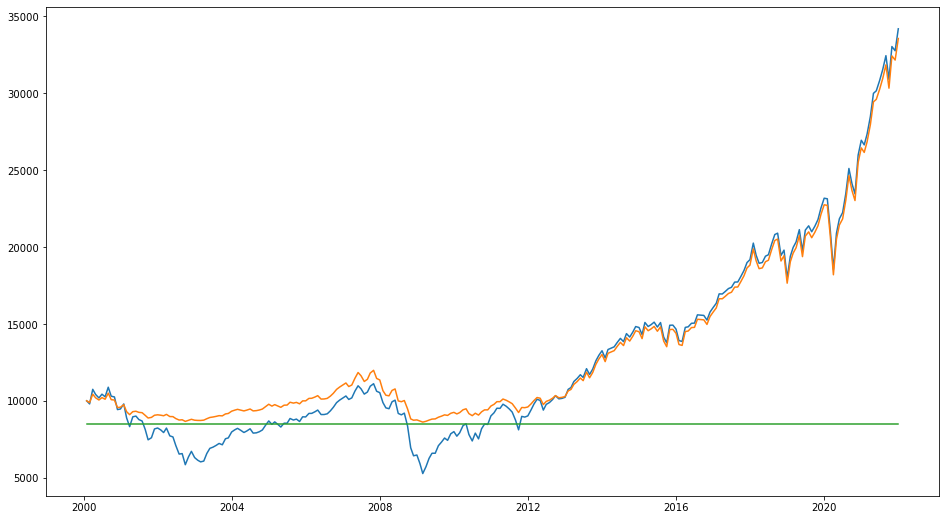

In [13]:
plt.figure(figsize=(16,9))

plt.plot(df.index, df['stock_only_budget'])
plt.plot(df.index, df['CPPI budget'])
plt.plot(df.index, df['floor'])

plt.show()

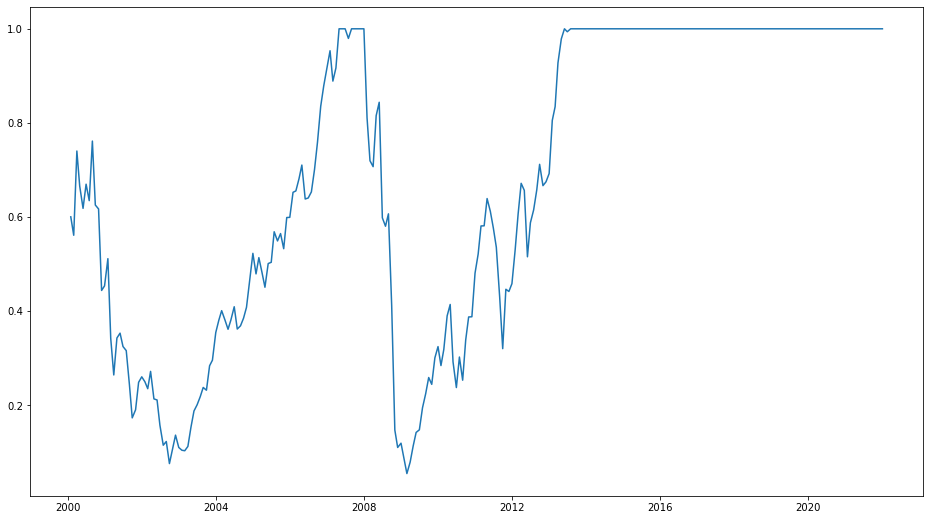

In [14]:
plt.figure(figsize=(16,9))

plt.plot(df.index, df['stock_prop'])

plt.show()

In [9]:
df.to_excel('CPPI_calculated.xlsx')

## FAQ

코드에 대한 질문은 본 포스팅 아래 댓글로 남겨주시면 최대한 답변드릴 수 있도록 하겠습니다.